In [1]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [2]:
# descriptive statistics
descriptive_stats = data.describe()

# unique values in each categorical column
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for col in cat_columns:
    unique_values[col] = data[col].unique()

display(descriptive_stats, unique_values)


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

In [3]:
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

# Splitting 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
if 'Blood Pressure' in data.columns:
    data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
    data['Diastolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)
else:
    print("'Blood Pressure' column not found!")

# Dropping 'Blood Pressure' and 'Person ID' columns
if 'Blood Pressure' in data.columns and 'Person ID' in data.columns:
    data.drop(['Blood Pressure', 'Person ID'], axis=1, inplace=True)
else:
    print("Columns 'Blood Pressure' or 'Person ID' not found!")


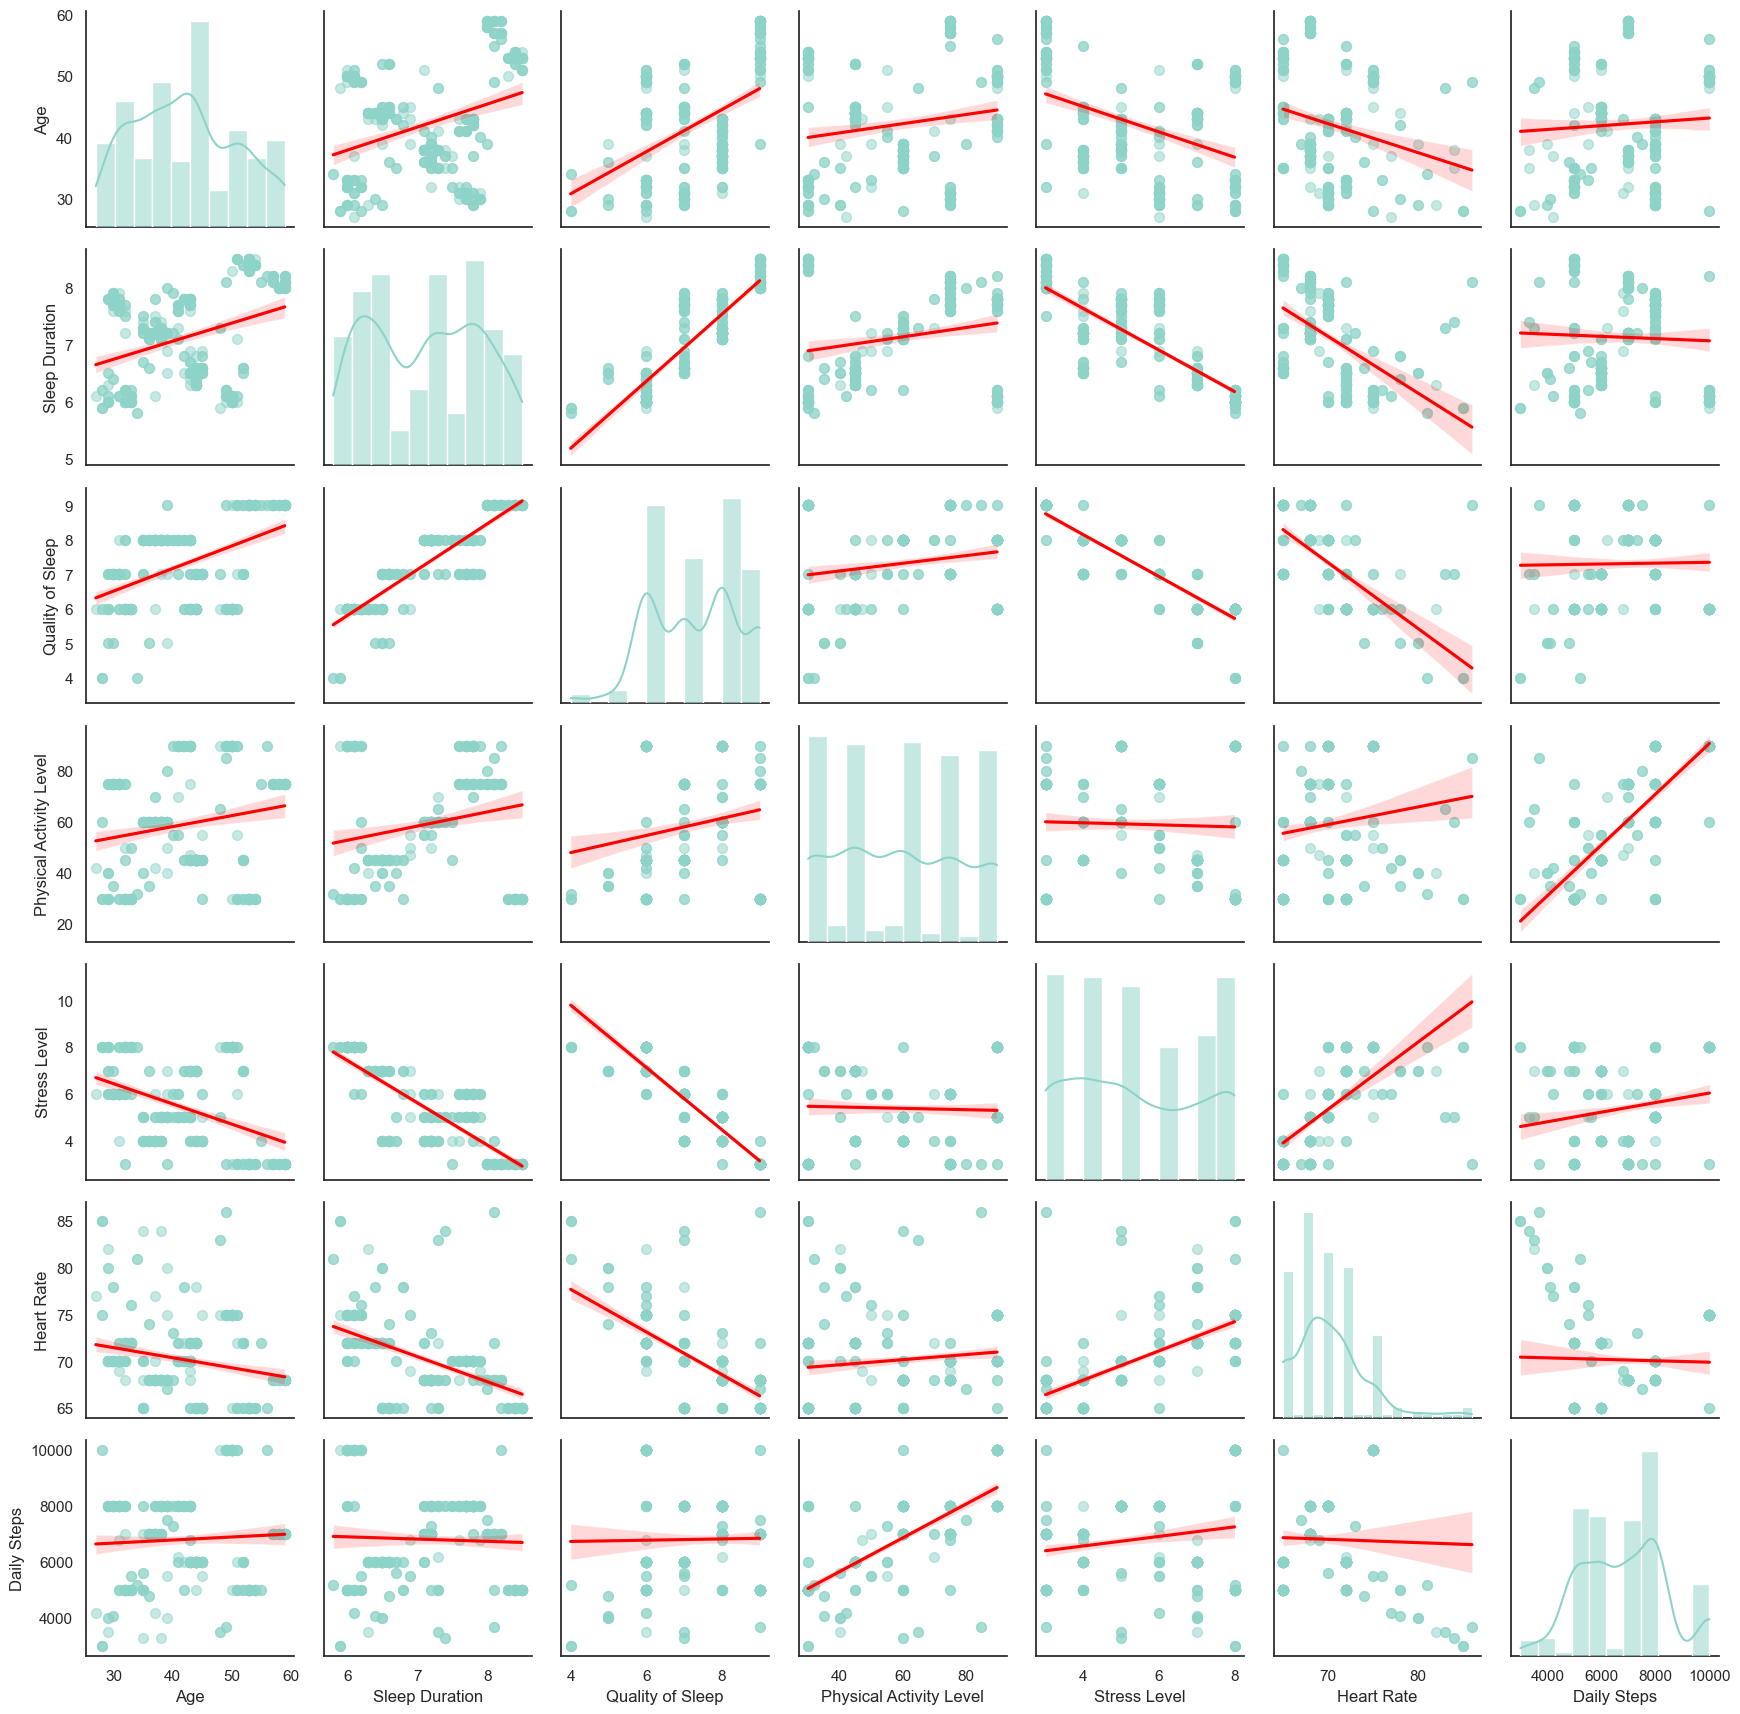

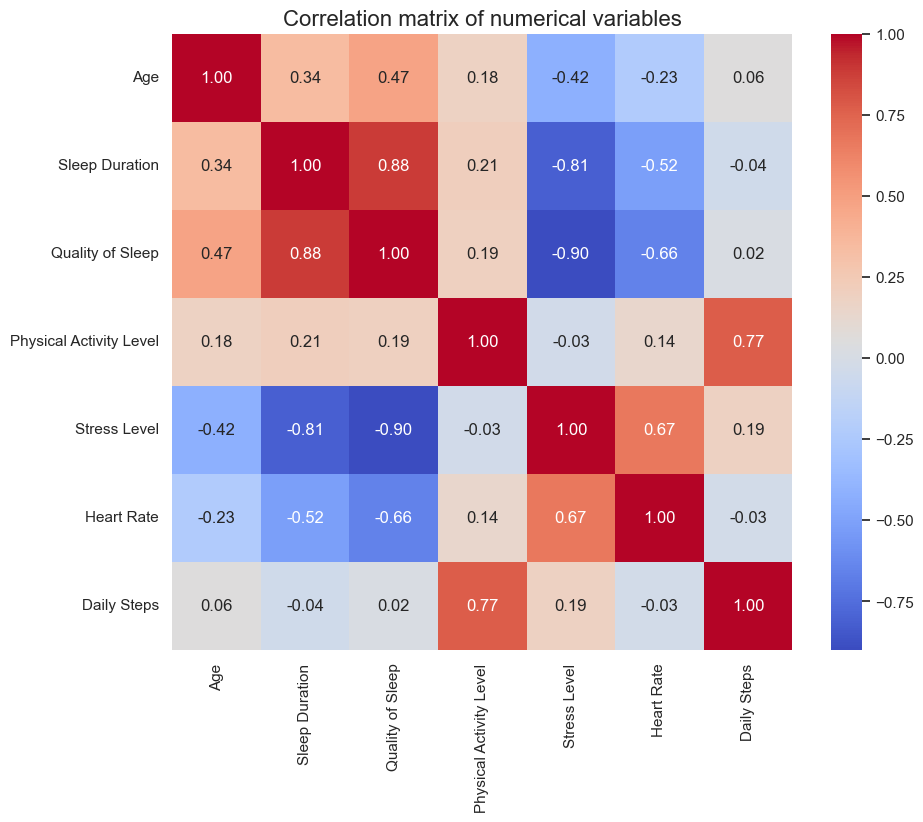

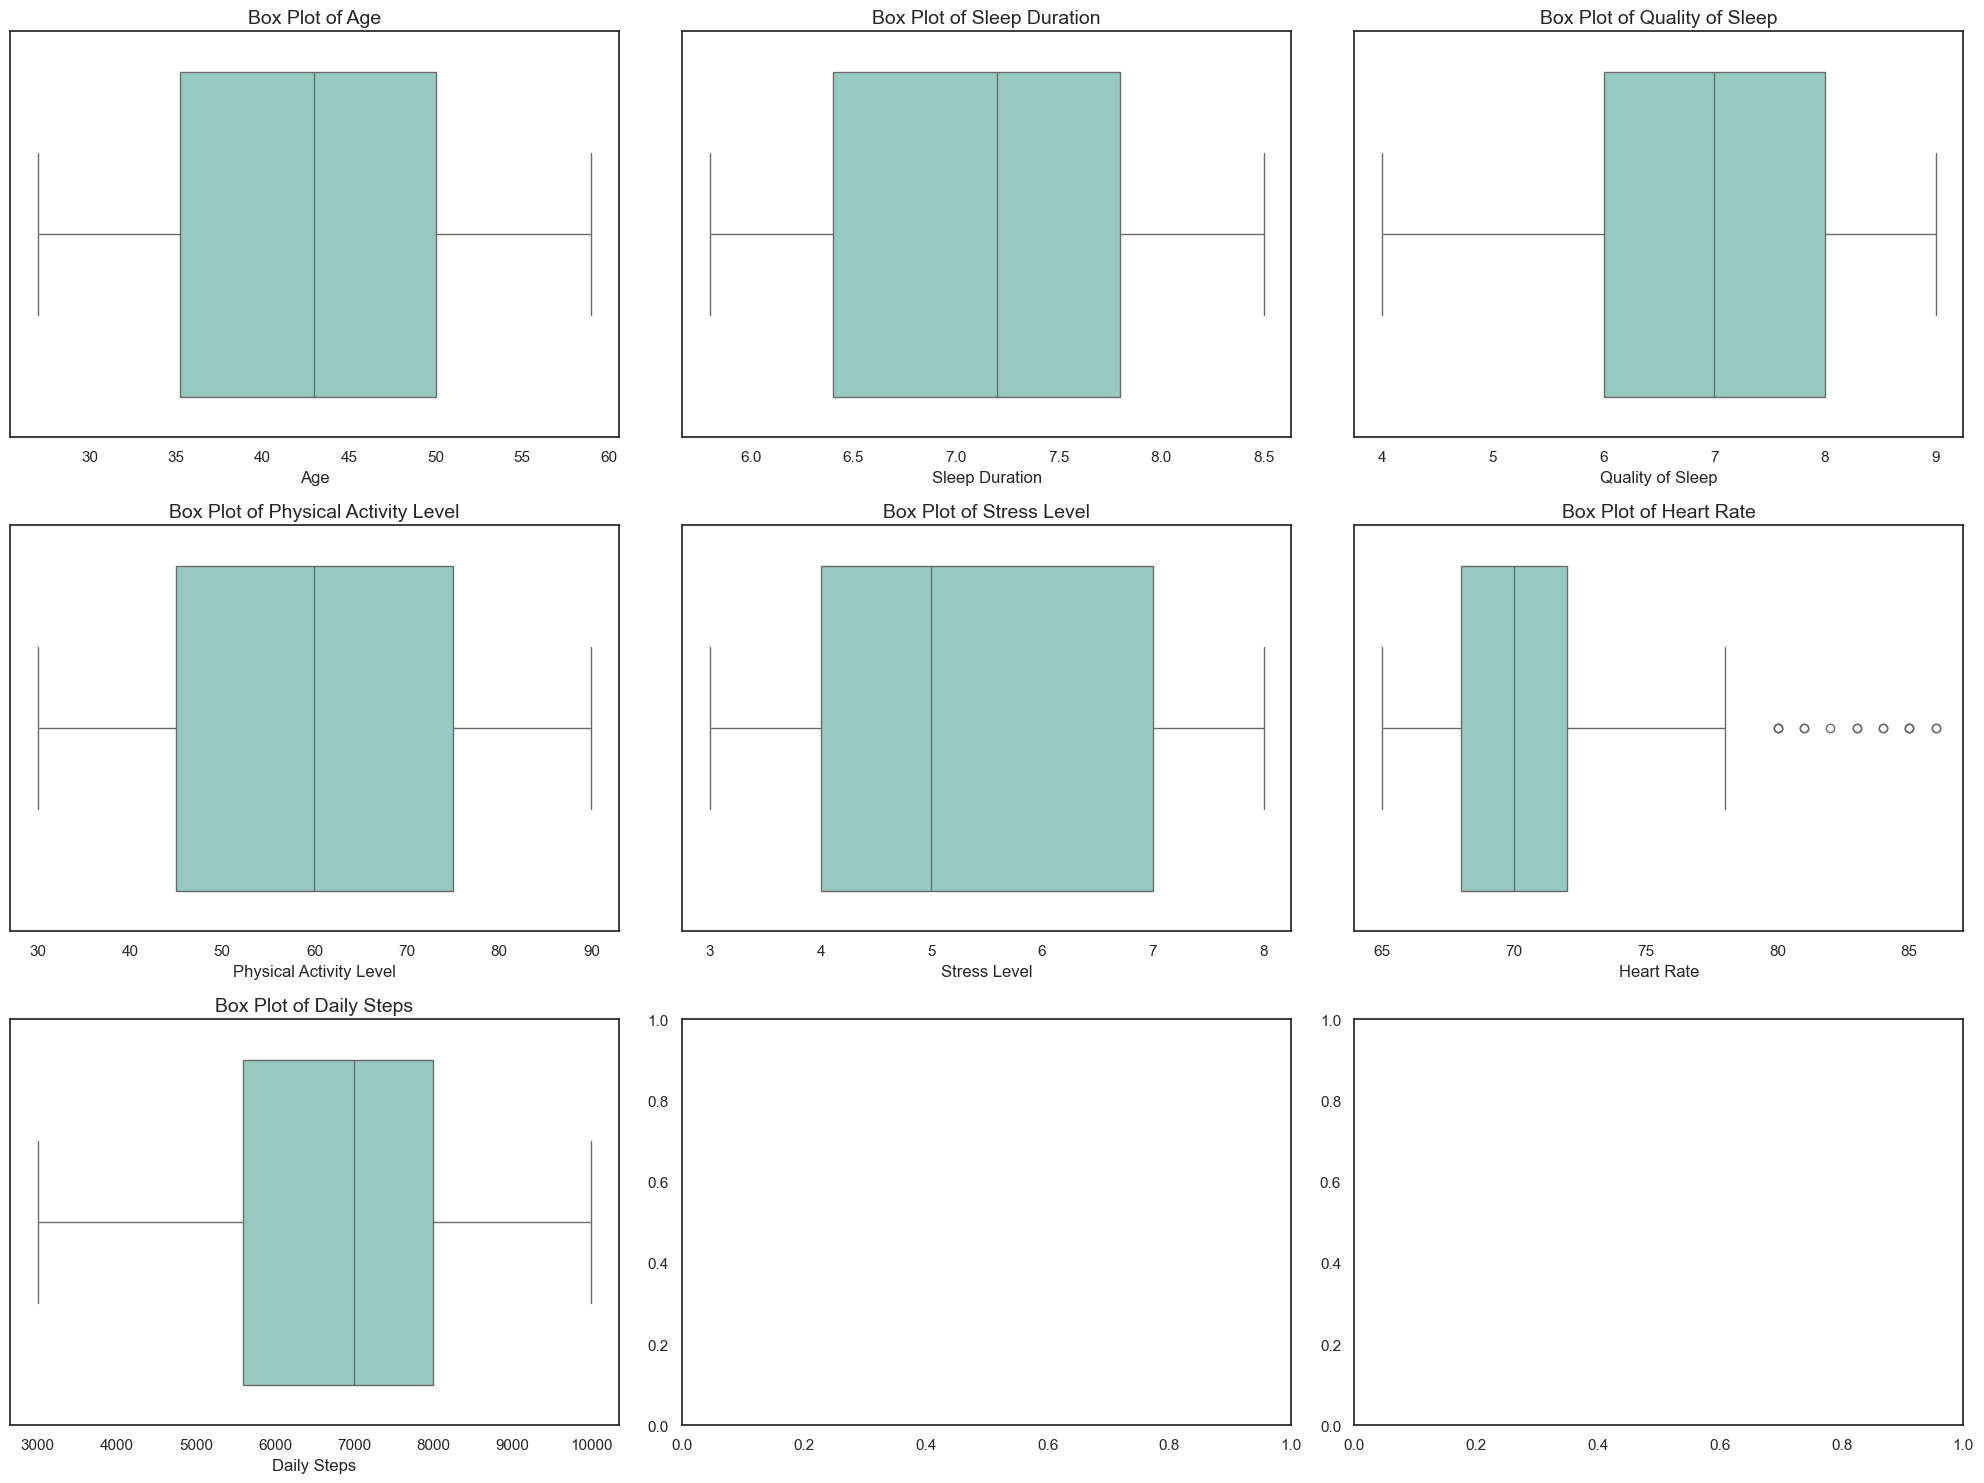

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set_palette(palette='Set3')

# List of key numerical variables
num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# PairGrid instance, mapping a histogram+KDE to the diagonal and regplot to the off-diagonal elements to show the bivariate distributions with a regression line
pair_grid = sns.PairGrid(data=data[num_vars], diag_sharey=False)

pair_grid.map_diag(sns.histplot, kde=True)

pair_grid.map_offdiag(sns.regplot, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})

# Correlation matrix
corr_matrix = data[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of numerical variables', fontsize=16)
plt.show()

# Box plots to identify any outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var}', fontsize=14)
    axes[row, col].set_xlabel(var, fontsize=12)
    
plt.tight_layout()
plt.show()

['No Disorder' 'Sleep Apnea' 'Insomnia']


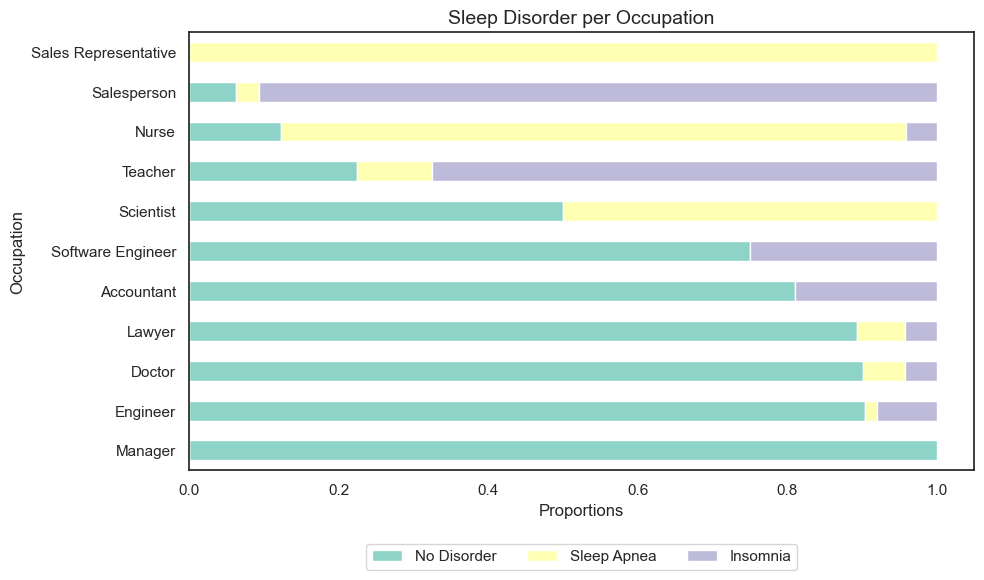

In [13]:
# Replace NaN values with 'No Disorder'
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

# Verify unique values after filling NaN
print(data['Sleep Disorder'].unique())

# Group by Occupation and calculate proportions
occup_dis = data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack()

# Ensure all categories are present, filling missing ones with 0
order_sleep_disorder = ['No Disorder', 'Sleep Apnea', 'Insomnia']
occup_dis = occup_dis.reindex(columns=order_sleep_disorder, fill_value=0)

# Sort by 'No Disorder' column
occup_dis = occup_dis.sort_values(by='No Disorder', ascending=False)

# Plot the data
fig, ax2 = plt.subplots(figsize=(10, 6))
occup_dis.plot(kind='barh', stacked=True, ax=ax2)
ax2.set_title('Sleep Disorder per Occupation', fontsize=14)
ax2.set_xlabel('Proportions', fontsize=12)
ax2.set_ylabel('Occupation', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()


In [14]:
#installing required libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = data.drop(['Sleep Disorder'], axis=1) 
y = data['Sleep Disorder']

# Label encoding for categorical variables in X
label_encoders = {}  # To store the encoder objects for potential inverse transformations later

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]

(   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0       1   27           9             6.1                 6   
 1       1   28           1             6.2                 6   
 2       1   28           1             6.2                 6   
 3       1   28           6             5.9                 4   
 4       1   28           6             5.9                 4   
 
    Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
 0                       42             6             2          77   
 1                       60             8             0          75   
 2                       60             8             0          75   
 3                       30             8             1          85   
 4                       30             8             1          85   
 
    Daily Steps  Systolic  Diastolic  
 0         4200       126         83  
 1        10000       125         80  
 2        10000       125         80  
 3         3000       14

In [17]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Applying StandardScaler to Numerical Variables
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

In [20]:
#Creating function to train and validate models
def train_and_cross_validate(model, X_train, y_train, cv=5):
    """
    Function to train the models using cross-validation and return the average score.
    """
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    print(f"{model.__class__.__name__} Cross-Validation F1_weighted: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")
    model.fit(X_train, y_train)  
    return model

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LogisticRegression Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.98      0.92      0.95        66
    Insomnia       0.81      0.92      0.86        24

    accuracy                           0.90       113
   macro avg       0.86      0.89      0.87       113
weighted avg       0.91      0.90      0.90       113



Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


Fitting 5 folds for each of 3 candidates, totalling 15 fits
RidgeClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.98      0.92      0.95        66
    Insomnia       0.81      0.92      0.86        24

    accuracy                           0.90       113
   macro avg       0.86      0.89      0.87       113
weighted avg      

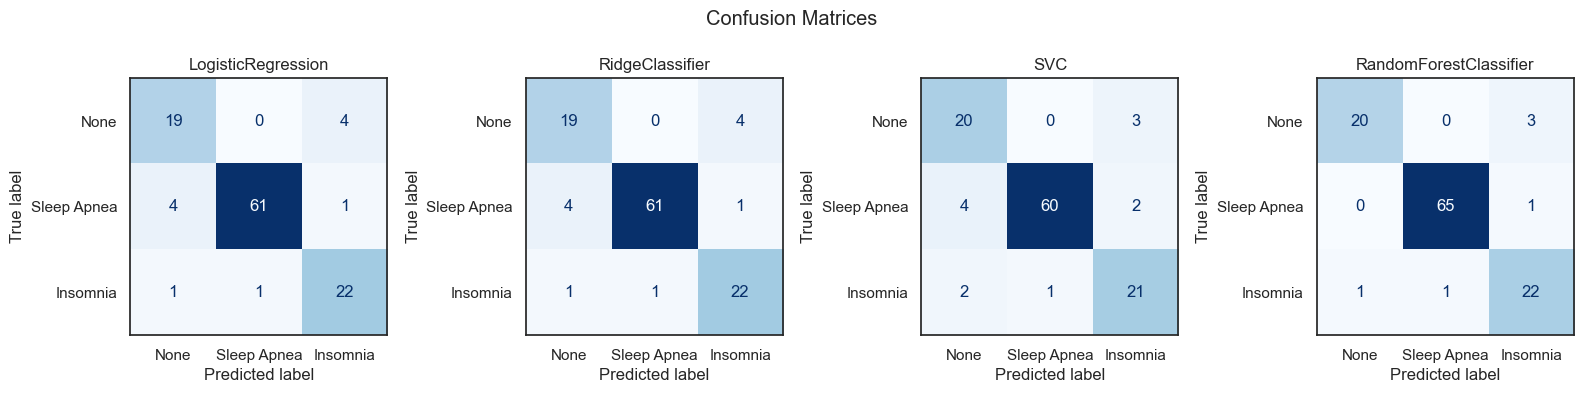

In [21]:
#Creating a function to perform grid search on models
def perform_grid_search(model, params, X_train, y_train):
    """
    Perform grid search for hyperparameter tuning.
    """
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Model parameters and configurations

param_grids = {
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']},
    "Ridge Classifier": {'alpha': [0.1, 1.0, 10.0]},
    "SVM": {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],  # Replaced 'auto' with valid options
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}



fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
axes = axes.flatten()

# Model training, hyperparameter tuning, evaluation, and plotting
for i, (name, model) in enumerate(models.items()):

    X_train_set, X_test_set = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else (X_train, X_test)
    best_model, best_params = perform_grid_search(model, param_grids[name], X_train_set, y_train)
    evaluate_and_plot_confusion_matrix(best_model, X_test_set, y_test, X_test_set, y_test, class_names, axes[i])
    print(f"Best Parameters for {name}: {best_params}")
    print("\n" + "="*80 + "\n")

plt.tight_layout()
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',  # Replacing 'auto' with 'sqrt'
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50
).fit(X_train, y_train)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

print(features_df.sort_values(by='Importance', ascending=False))


                    Feature  Importance
10                 Systolic    0.193870
11                Diastolic    0.145596
7              BMI Category    0.121802
2                Occupation    0.121167
1                       Age    0.105710
5   Physical Activity Level    0.084998
9               Daily Steps    0.072209
3            Sleep Duration    0.068416
8                Heart Rate    0.043240
4          Quality of Sleep    0.022542
6              Stress Level    0.010784
0                    Gender    0.009666
